# Import dependinces

In [ ]:
!pip install lingua-language-detector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install fasttext

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.impute import SimpleImputer
import string
from lingua import LanguageDetectorBuilder
import fasttext

# Import necessary data and data preprocessing

In [ ]:
main_df = pd.read_csv("/content/drive/MyDrive/STALKER_video_stat.csv")
df = pd.read_csv("/content/drive/MyDrive/STALKER_comments.csv")

In [ ]:
# check dataset about videos
main_df

,id,video_title,video_id,published_at,channel_name,views_count,like_count,comment_count
0,0,S.T.A.L.K.E.R. 2 – Trailer #1,r4xyN1n7ysQ,2020-07-23T17:17:54Z,GSC Game World,1075932,56903,7885
1,1,S.T.A.L.K.E.R. 2 – Skif,9avKD9rC318,2020-12-31T10:26:05Z,GSC Game World,782149,52295,4587
2,2,S.T.A.L.K.E.R. 2: Сердце Чернобыля — Официальн...,ZNLaKOlXVvw,2021-06-13T17:18:01Z,GSC Game World,2503274,153106,21771
3,3,S.T.A.L.K.E.R. 2: Heart of Chornobyl — Enter t...,4PqR5OBb1Ys,2022-06-14T18:28:39Z,GSC Game World,738160,32351,8170
4,4,S.T.A.L.K.E.R. 2: Heart of Chornobyl — Come to...,BB87nZ2Wldg,2022-12-29T19:04:50Z,GSC Game World,1431929,67605,13046
5,5,S.T.A.L.K.E.R. 2: Heart of Chornobyl — Bolts &...,bcDHClWRHd8,2023-08-24T14:22:55Z,GSC Game World,720627,28635,5306
6,6,S.T.A.L.K.E.R. 2: Heart of Chornobyl — Strider...,XNGbS0fY80s,2023-11-30T20:00:54Z,GSC Game World,658062,39120,4426
7,7,S.T.A.L.K.E.R. 2: Heart of Chornobyl — Final R...,6o6D_a3PAHw,2024-01-16T16:00:15Z,GSC Game World,504408,26007,4375
8,8,S.T.A.L.K.E.R. 2: Серце Чорнобиля — Трейлер «Ц...,zHQs4n-U94U,2024-04-26T12:19:32Z,GSC Game World,509637,29968,4519
9,9,S.T.A.L.K.E.R. 2: Серце Чорнобиля — Трейлер «Ч...,g6HH5kKLAlw,2024-06-09T18:14:24Z,GSC Game World,831281,51046,9861


In [ ]:
# check data frame about comments
df.head()

,id,author,published_at,like_count,text,reply_count,public
0,0,@prauwnsauce,2024-11-11T18:13:02Z,1.0,Slava Ukraini. 9 more days.,0.0,1.0
1,0,@Er3n_Jaeger_1,2024-11-11T02:18:35Z,1.0,9 days,0.0,1.0
2,0,@vitalii3143,2024-11-10T22:11:26Z,0.0,WE'VE NEARLY DONE IT! 9 DAYS LEFT GUYS!,0.0,1.0
3,0,@antianonym376,2024-11-09T04:31:02Z,0.0,11 days,0.0,1.0
4,0,@gunnarthesabercat7853,2024-10-24T13:26:49Z,0.0,The zone is coming just a few more days,0.0,1.0


In [ ]:
# check data for missing values
print("MAIN_DF_missing_values")
print(main_df.info())
print("-"*30)
print("COMMENTS_DF_missing_values")
print(df.info())

MAIN_DF_missing_values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             16 non-null     int64 
 1   video_title    16 non-null     object
 2   video_id       16 non-null     object
 3   published_at   16 non-null     object
 4   channel_name   16 non-null     object
 5   views_count    16 non-null     int64 
 6   like_count     16 non-null     int64 
 7   comment_count  16 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 1.1+ KB
None
------------------------------
COMMENTS_DF_missing_values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59445 entries, 0 to 59444
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            59445 non-null  object 
 1   author        59431 non-null  object 
 2   published_at  59445 non-null  object 
 3   like

as you can see we have some missing values in second dataset, so let's fix that by simple removing this data

In [ ]:
df.dropna(subset="text", inplace=True)
df = df.reset_index(drop=True)

In [ ]:
# check data again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59425 entries, 0 to 59424
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            59425 non-null  object 
 1   author        59411 non-null  object 
 2   published_at  59425 non-null  object 
 3   like_count    59425 non-null  float64
 4   text          59425 non-null  object 
 5   reply_count   59423 non-null  float64
 6   public        59423 non-null  float64
dtypes: float64(3), object(4)
memory usage: 3.2+ MB


we still get some missing values like in author column what probably should be unique (but not always) but it is not really crucial. We just can imput this missing values by simple imputer.

In [ ]:
most_feq_impute = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df["author"] = most_feq_impute.fit_transform(df[["author"]]).ravel()
df["reply_count"] = most_feq_impute.fit_transform(df[["reply_count"]]).ravel()
df["public"] = most_feq_impute.fit_transform(df[["public"]]).ravel()

In [ ]:
# so next we need to deal with date
main_df["published_at"] = pd.to_datetime(main_df["published_at"])
df["published_at"] = pd.to_datetime(df["published_at"])

# but i'm not interested in very accurate date, so let's convert in Y-M-D
main_df["published_at"] = main_df["published_at"].dt.strftime("%Y-%m-%d")
df["published_at"] = df["published_at"].dt.strftime("%Y-%m-%d")

## Text analysis and preprocessing

In [ ]:
# let's write two simple function which will count number of symbols and number of words in comments

def text_len(text: str):
  if isinstance(text, str):
    return len(text)
  else:
    return 0

def words_in_text(text: str):
  if isinstance(text, str):
    return len(text.split())
  else:
    return 0

df["sentence_length"] = df["text"].apply(lambda text: text_len(text))
df["words_num"] = df["text"].apply(lambda text: words_in_text(text))

In [ ]:
df.tail()

,id,author,published_at,like_count,text,reply_count,public,sentence_length,words_num
59420,15,@vipernitrox8324,2024-11-08,5.0,i cannot wait for this game,0.0,1.0,27,6
59421,15,@rekit180,2024-11-08,1.0,Первий яяяя,0.0,1.0,11,2
59422,15,@serhiivolynets2000,2024-11-08,0.0,Nice,0.0,1.0,4,1
59423,15,@abcdgwgdpwgapt,2024-11-08,0.0,楽しみすぎるぜ旦那,0.0,1.0,9,1
59424,15,@whyadesay,2024-11-08,1.0,W,0.0,1.0,1,1


so, here we see that words_num have 1 for some Asian language that why we also use sentence_length

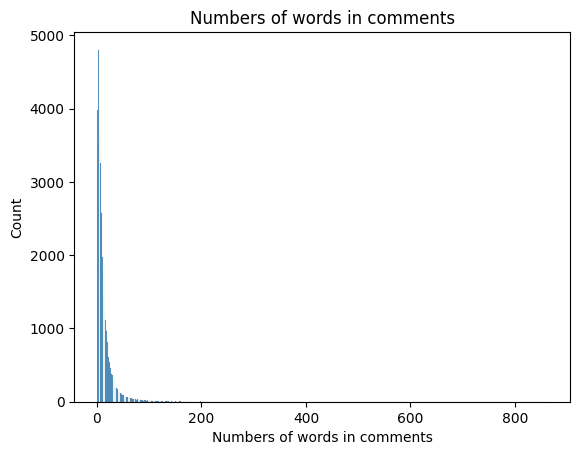

In [ ]:
sns.histplot(data=df, x="words_num")
plt.xlabel("Numbers of words in comments")
plt.ylabel("Count")
plt.title("Numbers of words in comments")

plt.show()

here we see that we have some a really large reviews, that is interesting

In [ ]:
# let's check the largest comment
df.iloc[df["words_num"].argmax(),:]["text"]

"1.Марія Григорович що за невпевненість в голосі??? Як наче не готувалася до інтерв’ю.\r\n 2.Євген Григорович та Дмитро Аношка, що це за супер акцент?\r\n3.Ігор Довготелес…Катсцени якщо чесно…ну не дуже. Ну чесно.\r\n 4.Євген Григорович, чому цю гру неможна поставити поряд?? Ви багато чого взяли з інших доволі популярних ігор, то чому не можна? Чому нема?\r\n5.Євген Григорович, про що ти кажеш? Що рольова гра згоден…але аж ніяк не в тілі сталкера..\r\n 6.Марія Григорович….Ну тут просто амбєц. Яке йди куди хочеш? Яке роби що хочеш? Яке відчувай?? Про що мова? Судячи з графіки, геймплею та всього іншого, це просто тупо рольова гра. Ти ніхто та звати тебе ніяк. Роби як сказали розробники та не балуйся.(Це я про головного героя))\r\n7. 04:48 Дмитро Аношка…я нічого не зрозумів…чесно. Ти говори або на російській або на солов’їній, можеш і англійською, не важливо. Але те що ти намагаєшся видавити з себе…просто незрозуміла беліберда. З 04:48 дуже боляче дивитися…І дуже образливо. Чим кормили т

from that we see two languages in this comment what makes analysis much harder

In [ ]:
df["public"].value_counts().reset_index()

,public,count
0,1.0,59425


In [ ]:
df.drop(columns="public", inplace=True)

In [ ]:
uniq_aut = df["author"].nunique()
print(f"Number of unique authors in all comments: {uniq_aut}")

Number of unique authors in all comments: 42695


In [ ]:
df.describe()

,like_count,reply_count,sentence_length,words_num
count,59425.000000,59425.000000,59425.000000,59425.000000
mean,8.178999,0.813546,87.422667,14.694960
std,120.367858,3.861557,150.779061,24.925029
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,25.000000,4.000000
50%,0.000000,0.000000,49.000000,8.000000
75%,1.000000,0.000000,96.000000,16.000000
max,12378.000000,228.000000,5094.000000,863.000000


In [ ]:
# let's see the most popular comment
df[df["like_count"] == 12378]

,id,author,published_at,like_count,text,reply_count,sentence_length,words_num
22140,2,@Fladar,2021-06-13,12378.0,-И куда ты теперь?\n-Предзаказывать,98.0,34,5


In [ ]:
# the most discussed comment
df[df["reply_count"] == 228]

,id,author,published_at,like_count,text,reply_count,sentence_length,words_num
31039,4,@sugadaddy123,2022-12-29,1279.0,"Минута молчания в честь тех, кто уже никогда н...",228.0,58,11


### Text cleaning

Here we do a large scale job, because need to clean text comment data for analysis like for identifying of what language of comment and for future sentiment analysis. So let's try!

In [ ]:
text_with_links = []

for item in df.itertuples():
  if ("https://" in item.text) or ("http://" in item.text):
    text_with_links.append(item.Index)

print(len(text_with_links))

89


In [ ]:
# let's see first 5 comment with links
for i in range(5):
  comment_index = text_with_links[i]
  text = df.loc[comment_index, :]["text"]
  print(text)
  print("-"*20)

https://youtube.com/shorts/hT6f1c-Batw?feature=share
--------------------
@GSC look at this : https://youtu.be/cApG7Uh9pgs
--------------------
То что было совсем не оригинал зацените какое видео
идея а меченного 3д незя новую модель сделать в unreal или cry?
 https://www.youtube.com/watch?v=FtjE10uz37c&t=55s
--------------------
Ожидание как целая вечность. СПАСИБО огромное за это превью!!! Так же хочу поделиться:  https://www.youtube.com/watch?v=ukoiJF4zz6I&list=PLySiy68dw4Fi1IKxdgkw4ec5V5L-vl76x ===это Firelake - Dirge for Planet (S.T.A.L.K.E.R) with lyrics ***В ИСПОЛНЕНИИ ПИАНО*** РЕДЧАЙШИЙ АРТЕФАКТ. Который возможно многие искали, но не смогли обнаружить.
--------------------
FAQs traducidas en STALKERHispano https://stalkerhispano.com/noticias/primer-trailer-de-s-t-a-l-k-e-r-2-y-preguntas-frecuentes-traducidas.php

Muchas gracias por vuestro trabajo GSC Game World!
--------------------


Most of these comments are self-promotion, so we can delete them

In [ ]:
df.drop(text_with_links, inplace=True)

drop punctuation, drop stopwords, drop nums (only nums), drop emojies, lower case, remove double spaces and tripple or more symbols in words

In [ ]:
extra_punctuation = ['•', '£', '·', '©', '®', '→', '°', '€', '™', '›', '♥', '←',
                     '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★',
                     '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑',
                     '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
                     '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨',
                     '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã',
                     '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»', '，',
                     '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤',
                     'Ø', '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§',
                     '£', '₤', '₽', '₴', '"', "`", '…', '"', '\n', '\r']

string_ext_punct = "".join(extra_punctuation)

In [ ]:
def drop_emojies(text: str):
  emoji_pattern = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # Emoticons
    u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # Transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # Flags
    u"\U0001F900-\U0001F9FF"  # Supplemental symbols & pictographs
    u"\U0001FA70-\U0001FAFF"  # Symbols & pictographs extended-A
    u"\U0001F000-\U0001F02F"  # Mahjong tiles
    u"\U0001F0A0-\U0001F0FF"  # Playing cards
    u"\U00002600-\U000026FF"  # Miscellaneous symbols
    u"\U00002700-\U000027BF"  # Dingbats
    u"\U00002B50-\U00002B59"  # Stars and a few other symbols
    u"\U0001F680-\U0001F6C5"  # Transport symbols, again for completeness
    u"\U0001F201-\U0001F251"  # Enclosed characters
    u"\U0001F004"              # Mahjong tile red dragon
    u"\U0001F18E"              # Cross mark (Japanese)
    u"\U0001F191-\U0001F19A"   # Squared Latin abbreviations
    "]+",
    flags=re.UNICODE
  )
  return emoji_pattern.sub(r'', text)

def drop_punctuation(text: str, ext_punct=string_ext_punct):
  str_punct = string.punctuation + ext_punct
  translator = str.maketrans("", "", str_punct)
  return text.translate(translator)

def drop_numbers(text: str):
  return re.sub(r'\d+', "", text)

def other_preprocessing(text: str):
  text = re.sub(r'(.)\1{2,}', r'\1', text)
  text = re.sub(r'\s+', ' ', text)
  text = text.lower()
  return text.strip()

In [ ]:
df["text"] = df["text"].apply(lambda text: drop_emojies(text))
df["text"] = df["text"].apply(lambda text: drop_punctuation(text))
df["text"] = df["text"].apply(lambda text: drop_numbers(text))
df["text"] = df["text"].apply(lambda text: other_preprocessing(text))

In [ ]:
# after rough data cleaning let's remove all blanks in data

blanks = []

for item in df.itertuples():
  text = item.text
  if type(text) == str:
    if text.isspace() or text == "":
      blanks.append(item.Index)

print(len(blanks))

134


In [ ]:
df.drop(blanks, inplace=True)
df = df.reset_index(drop=True)

# Language text recognition

as we have a really large number of comments in different language we should try to detect this language and try to do sentiment analysis on most popular language. The main idea in this project was to compare audiences and their sentiments. And the main focus was supposed to be on English, Ukrainian and russian audiences as a largest stalkers community.

In [ ]:
def define_language(detector, text:str):
  if isinstance(text, str):
    detected_language = detector.detect_language_of(text)
    return detected_language.name if detected_language else "UNKNOWN"
  else:
    return "UNKNOWN"

In [ ]:
detector = LanguageDetectorBuilder.from_all_languages().build()
df["text_lingua_language"] = df["text"].apply(lambda text: define_language(detector, text))

In [ ]:
df[df["text_lingua_language"] == "UKRAINIAN"].head()

,id,author,published_at,like_count,text,reply_count,sentence_length,words_num,text_lingua_language
14,0,@Sos0mbo,2024-07-23,3.0,роки першому трейлеру відчуваю себе старим,0.0,45,7,UKRAINIAN
21,0,@deirmix,2024-02-14,7.0,круті були часи коли я в перше побачив трейлер...,1.0,171,29,UKRAINIAN
35,0,@EzSup,2023-03-12,3.0,пасхалка з пророче та й завжди це актуально було,0.0,58,10,UKRAINIAN
51,0,@Jgffjkt6,2022-08-12,13.0,шкода те що через таких рашистів як путлер від...,5.0,134,22,UKRAINIAN
709,0,@Usvidom,2021-06-01,0.0,з нетерпінням чекаю коли сталкер з торенту скачаю,0.0,55,10,UKRAINIAN


so, we identified language for comments, but let's do this again but with another package, more powerfull

In [ ]:
model = fasttext.load_model('/content/drive/MyDrive/papka/lid.176.bin')  # model

def lang_identification(text: str, model=model):
  results = model.predict(text)
  result = results[0][0].replace("__label__", "")
  return result

In [ ]:
df["text_fasttext"] = df["text"].apply(lambda text: lang_identification(text))

In [ ]:
df.head()

,id,author,published_at,like_count,text,reply_count,sentence_length,words_num,text_lingua_language,text_fasttext
0,0,@prauwnsauce,2024-11-11,1.0,slava ukraini more days,0.0,28,5,ENGLISH,en
1,0,@Er3n_Jaeger_1,2024-11-11,1.0,days,0.0,6,2,SOMALI,en
2,0,@vitalii3143,2024-11-10,0.0,weve nearly done it days left guys,0.0,39,8,ENGLISH,en
3,0,@antianonym376,2024-11-09,0.0,days,0.0,7,2,SOMALI,en
4,0,@gunnarthesabercat7853,2024-10-24,0.0,the zone is coming just a few more days,0.0,39,9,ENGLISH,en


at first glance, we obtained more accurate results using the second method, let's take a look more detail..

In [ ]:
uniq_lang_1 = df["text_lingua_language"].nunique()
uniq_lang_2 = df["text_fasttext"].nunique()

print(f"Numbers of unique languages by first method: {uniq_lang_2}")
print(f"Numbers of unique languages by second method: {uniq_lang_2}")

Numbers of unique languages by first method: 102
Numbers of unique languages by second method: 102


In [ ]:
df.groupby("text_lingua_language").size().reset_index().rename(columns={0: "amount"}).sort_values(by="amount", ascending=False).head()

,text_lingua_language,amount
46,RUSSIAN,29375
17,ENGLISH,13737
61,UKRAINIAN,9627
6,BELARUSIAN,599
10,BULGARIAN,560


In [ ]:
df.groupby("text_fasttext").size().reset_index().rename(columns={0: "amount"}).sort_values(by="amount", ascending=False).head()

,text_fasttext,amount
77,ru,31033
23,en,14591
94,uk,9882
47,kk,632
25,es,317


as see second method more accurate

In [ ]:
df.drop(columns=["sentence_length", "words_num", "text_lingua_language"], inplace=True)

# recreate sentence length and number of words after preprocessing thing
df["sentence_length"] = df["text"].apply(lambda text: text_len(text))
df["words_num"] = df["text"].apply(lambda text: words_in_text(text))

In [ ]:
# save what we get
main_df.to_csv("/content/drive/MyDrive/STALKER_clear_videos.csv", index=False)
df.to_csv("/content/drive/MyDrive/STALKER_clear_comments.csv", index=False)

___

# DONE